# To predict the expected profit of a start-up firm. (SLR)
     
#### link - https://www.kaggle.com/farhanmd29/50-startups
     
## Problem Statement

Earning a profit is important to startups because it decides whether a company can secure financing from a bank, attract investors to fund its operations, and grow its business. Companies cannot remain in business without turning a profit. Startups are full of promise and excitement, but the flip side is, they’re also full of risk and uncertainty. There are a lot of great ideas out there that somehow never get off the ground, and, conversely, there are plenty of questionable ones that become massive successes.
So, the big picture is a puzzle: Look objectively at a list of successes and failures, and you'll be hard-pressed to pinpoint any one reason why one startup would succeed over another. That’s there are no one factors for profit and revenue, there are dozens.


In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
# checking contents of the folder
import os
os.listdir()

['.ipynb_checkpoints',
 '50_startup.ipynb',
 '50_Startups.csv',
 'no outlier',
 'outlier']

In [49]:
#read CSV file
df = pd.read_csv('50_Startups.csv')

#(removing 0's from dataframe)
#df = df[(df[['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']] != 0).all(axis=1)]   

In [50]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [51]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# EDA (Exploratory Data Analysis)


In [52]:
print(df.info())
print('\n=================================================================\n')
print(df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None


                 count         mean            std       min          25%  \
R&D Spend         50.0   73721.6156   45902.256482      0.00   39936.3700   
Administration    50.0  121344.6396   28017.802755  51283.14  103730.8750   
Marketing Spend   50.0  211025.0978  122290.310726      0.00  129300.1325   
Profit            50.0  112012.6392   40306.180338  14681.40   90138.9025   

                        50%          75%        max  
R&D Spend         73051.080  101602.8000  165349.20  
Administration   122699

## Checking for null values if any.

In [53]:
# null values check
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# Checking for the multicolinearity 
####  (predictors that are correlated with other predictors).

                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000




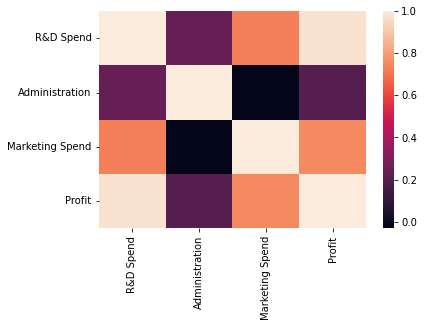

In [54]:
print (df.drop('State', axis  = 1).corr())
print('\n=================================================================\n')
sns.heatmap(df.drop('State', axis  = 1).corr());

In [55]:
correlation = pd.DataFrame(1/(1-df.corr()))
correlation

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,inf,1.319183,3.626449,36.901003
Administration,1.319183,inf,0.968848,1.251121
Marketing Spend,3.626449,0.968848,inf,3.964568
Profit,36.901003,1.251121,3.964568,inf


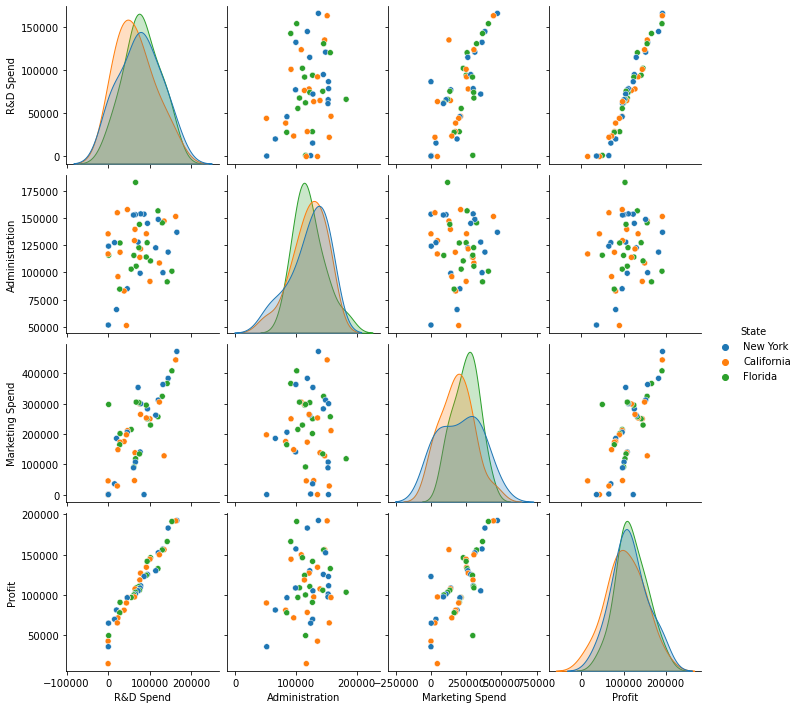

In [56]:
#pairplot for checking multicollinearity and coorelation.
sns.pairplot(df,hue = 'State');

<AxesSubplot:>

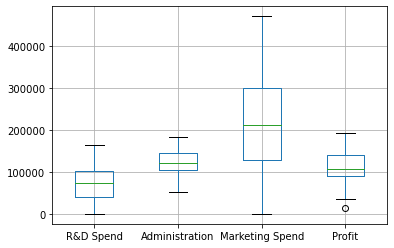

In [57]:
# checking for outliers using box plot.
df.boxplot()

In [58]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

<AxesSubplot:>

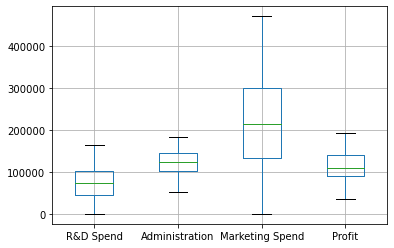

In [59]:
df = remove_outlier(df,'Profit')
df.boxplot()

### Selecting feature -  as the above graphs and coorelation plots suggest ...
That the correlation between the response variable (“Profit”) and predictor variable (“Research and development spend”) has the highest correlation coefficient of 0.972 i.e 97.2%. Hence, we recognized that this should be the most important variable affecting the decision for functioning and initialization of a start-up.

In [60]:
df_slr = df[['R&D Spend', 'Profit']]
X = pd.DataFrame(df['R&D Spend'])
y = pd.DataFrame(df['Profit'])

In [61]:
# available metrics to choose from
from sklearn import metrics 
#sorted(metrics.SCORERS.keys())

In [62]:
from sklearn.linear_model import LinearRegression
model_slr = LinearRegression()

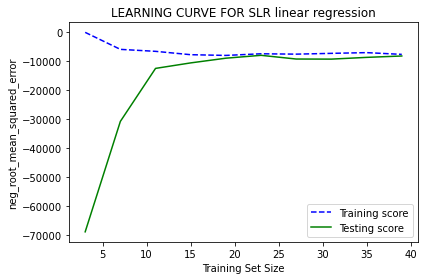

In [63]:
from sklearn.model_selection import learning_curve
sizes, training_scores, testing_scores = learning_curve(model_slr, X, y, cv=5, scoring='neg_root_mean_squared_error',  random_state=100,train_sizes=np.linspace(0.1, 1.0, 10))
sizes
mean_testing = np.mean(testing_scores, axis=1)
mean_training = np.mean(training_scores, axis=1)

plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Testing score")

plt.title("LEARNING CURVE FOR SLR linear regression")
plt.xlabel("Training Set Size"), plt.ylabel("neg_root_mean_squared_error"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

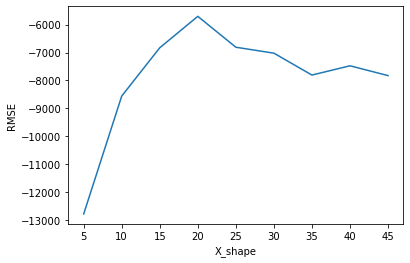

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

results = pd.DataFrame(columns = ['Size', 'X_shape', 'RMSE'])
for i in np.linspace(0.1, 0.9, 9):
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= (round(i,1)) ,random_state=101)
    scores_slr = cross_val_score(model_slr,X = X_train,y= y_train,scoring= 'neg_root_mean_squared_error',cv=4)
    results = results.append({'Size' : (round(i,1)), 'X_shape' : int((round(i,1))*50), 'RMSE' : scores_slr.mean()}, ignore_index = True)

sns.lineplot (x='X_shape',y='RMSE',data= results)
plt.show()

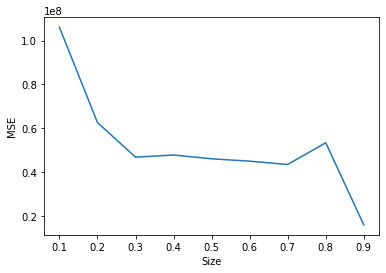

In [65]:
from sklearn.metrics import mean_squared_error,r2_score
results = pd.DataFrame(columns = ['Size', 'coefficient', 'MSE'])
for i in np.linspace(0.1, 0.9, 9):
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= (round(i,1)),random_state= 100)
    model_slr.fit(X_train,y_train)
    #print (i)
    #print("Coefficients: ", model_slr.coef_[0][0])
    #print("Mean squared error: %.2f" % mean_squared_error(y_test, (model_slr.predict(X_test))))
    
    results = results.append({'Size' :i, 'coefficient' : model_slr.coef_[0][0], 'MSE' : mean_squared_error(y_test, (model_slr.predict(X_test)))}, ignore_index = True)

sns.lineplot (x='Size',y='MSE',data= results)
plt.show()


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= 0.9,random_state= 100)
model_slr.fit(X_train,y_train)
y_pred_slr = model_slr.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_slr))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred_slr))

Mean squared error: 15794346.41
Coefficient of determination: 0.98


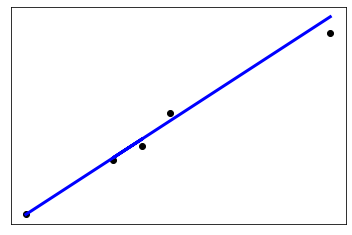

In [67]:
# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred_slr, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()